In [1]:
from functools import reduce
from itertools import combinations, permutations, product
from math import comb, factorial, perm
from operator import mul, sub
import sympy as sym

**Содержание**<a id='toc0_'></a>    
- [__Комбинаторика: теория__](#toc1_1_1_)    
- [__Комбинаторика: решение задач__](#toc1_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

***
## <a id='toc1_1_1_'></a>[__Комбинаторика: теория__](#toc0_)

__Правило суммы__. Если элемент $A_1$ может быть выбран $n_1$ способами, элемент $A_2$ - _другими_ $n_2$ способами, $A_3$ - _отличными_ от первых двух $n_3$ способами и т.д., $A_k$ - $n_k$ способами, отличными от первых $(k - 1)$, то выбор одного из элементов: или $A_1$, или $A_2$, ..., или $A_k$ может быть осуществлен $n_1 + n_2 + ... + n_k$ способами.

__Правило произведения__. Если элемент $A_1$ может быть выбран $n_1$
способами, _после_ каждого такого выбора элемент $A_2$ может быть выбран $n_2$ способами и т.д., после каждого $(k-1)$ выбора элемент $A_k$ может быть выбран $n_k$ способами, то выбор всех элементов $A_1, A_2, ..., A_k$ в указанном порядке может быть осуществлен $n_1 n_2 ... n_k$ способами.

Если комбинации из $n$ элементов по $m$ отличаются либо составом элементов, либо порядком их расположения (либо и тем и другим), то такие комбинации называют __размещениями__ из $n$ элементов по $m$. Число размещений из $n$ элементов по $m$ равно

$$\Large A^m_n = \frac{n!}{(n-m)!}.$$

Если комбинации из $n$ элементов по $m$ отличаются _только составом_ элементов, то их называют __сочетаниями__ из $n$ элементов по $m$. Число сочетаний из $n$ элементов по $m$ равно

$$\Large C^m_n = \binom{n}{m} = \frac{n!}{m!(n-m)!}.$$

$$\small (a+b)^n = \binom{n}{n}a^n + \binom{n}{n-1}a^{n-1}b + \binom{n}{n-2}a^{n-2}b^2 +...+ \binom{n}{k}a^kb^{n-k} +...+ \binom{n}{1}ab^{n-1} + \binom{n}{0}b^n.$$

$$\Large \sum_{k=0}^{n} \binom{n}{k} = 2^n$$

Если комбинации из $n$ элементов отличаются только порядком расположения этих элементов, то их называют __перестановками__ из $n$ элементов. Число перестановок из $n$ элементов равно
$$\Large P_n = n!$$

Если в размещениях (сочетаниях) из $n$ элементов по $m$ некоторые из элементов (или все) могут оказаться одинаковыми, то такие размещения (сочетания) называют размещениями (сочетаниями) __с повторениями__ из $n$ элементов по $m$.

Число размещений с повторениями из $n$ элементов по $m$ равно
$$\Large \tilde{A}^m_n = n^m$$

Число сочетаний с повторениями из $n$ элементов по $m$ равно
$$\Large \tilde{C}^m_n = C^m_{n+m-1}$$

Если в перестановках из общего числа $n$ элементов есть $k$ различных элементов, при этом 1-й элемент повторяется $n_1$ раз, 2-й элемент - $n_2$ раз, $k$-й элемент - $n_k$ раз, причем $n_1 + n_2 + ... + n_k = n$, то такие перестановки называют перестановками с повторениями из $n$ элементов. Число перестановок с повторениями из $n$ элементов равно
$$\Large P_n(n_1,n_2,...,n_k) = \frac{n!}{n_1!n_2!...n_k!}$$

***
## <a id='toc1_1_2_'></a>[__Комбинаторика: решение задач__](#toc0_)

__Задача__. У вас есть $10$ различных футболок с принтами. Вы хотите надеть в понедельник одну футболку, во вторник другую, ..., в воскресенье седьмую футболку - по одной в каждый из дней недели. Футболки не должны повторяться. Сколько есть способов это сделать?

In [2]:
perm(10, 7)

604800

In [3]:
reduce(mul, range(10, 3, -1))

604800

__Задача__. У вас есть черная и белая кошка. Вы поставили по кругу $10$ мисок с едой. Кошки едят из случайных мисок, но никогда из одной. Найти вероятность того, что кошки едят из соседних мисок.

In [4]:
# Не комбинаторно, моделированием вероятностного пространства
n = 10
omega = permutations(range(n), 2)
n_omega = n**2 - n  # число эл. квадратной матрицы без учета эл. гл. диагонали
n_valid = sum(1 for pair in omega if abs(sub(*pair)) in (1, 9))
round(n_valid / n_omega, 3)

0.222

__Задача__. Группа из $22$ человек собирается поиграть в футбол. Для этого они хотят разделиться на две команды. Есть $11$ оранжевых футболок, с номерами от $1$ до $11$, и $11$ фиолетовых футболок, с номерами от $1$ до $11$. Футболки раздаются случайным образом. Какова вероятность, что Вика и Максим окажутся в разных командах?

__Решение__. Не комбинаторно, моделированием вероятностного пространства. Применим сквозную нумерацию - представим, что фиолетовый набор это продолжение оранжевого:

In [5]:
def diffTeams(pair: tuple[int, int]) -> bool:
    """Team A: [1,11], team B: [11,22].
    Return True if (A,B) or (B,A). """
    return sum(elem > 11 for elem in pair) == 1

n = 22
omega = permutations(range(1, n+1), 2)
n_omega = n**2 - n  # число эл. квадратной матрицы без учета эл. гл. диагонали
n_valid = sum(1 for pair in omega if diffTeams(pair))
round(n_valid / n_omega, 3)

0.524

__Задача__. В штабе некоторого политика $20$ человек. Нужно выбрать пресс-секретаря, руководителя и координатора. Каждый может претендовать на каждую из трех должностей, но не может занимать более одной.

1. Каковы шансы Лены попасть в тройку, которую выбирают?
2. $10$ человек сказали, что не готовы взять роль пресс-секретаря, но Лена не в их числе. Какие теперь у неё шансы попасть в тройку?

__Решение__. Поскольку каждый претендент может занимать не более одной должности, на каждом последующем этапе необходимо учитывать (умножать на) вероятность одновременного проигрыша на всех предыдущих (или, эквивалентно, вычитать из единицы вероятность выигрыша):

In [6]:
# вопрос 1, подробно
1/20 + (1 - 1/20) * 1/19 + (1 - 1/20) * (1 - 1/19) * 1/18

0.15000000000000002

In [7]:
# вопрос 2, коротко
1/10 + (1 - 1/10)/19 + (1 - 1/10)*(1 - 1/19)/18

0.19473684210526318

__Задача__. $6$ футболок случайным образом раскладываются по $4$ полкам. Какова вероятность того, что на нижней полке оказалась хотя бы одна футболка?

__Решение__. Не комбинаторно, моделированием вероятностного пространства. $6$-местный кортеж в $\Omega$ кодирует локации метками $(0,1,2,3)$: 

In [8]:
shelves, shirts = 4, 6
omega = product(range(shelves), repeat=shirts)
n_omega = shelves**shirts  # 6 слотов, в каждом слоте барабан на 4 значения
n_valid = sum(1 for seq in omega if 0 in seq)
round(n_valid / n_omega, 3)

0.822

__Задача__. $7$ томов, $3$ из которых имеют синюю обложку, $4$ - красную, расставлены на полке в случайном порядке. Найти вероятность того, что сначала идут все красные.

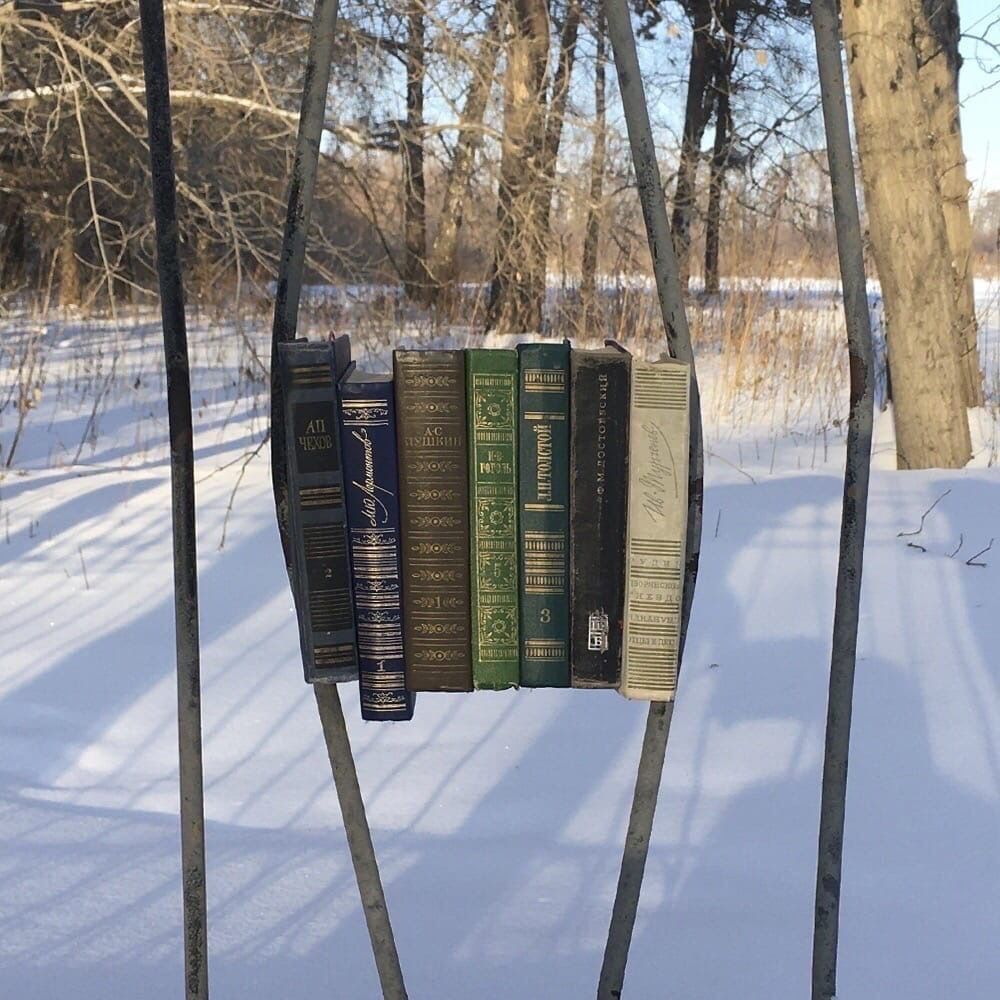

In [9]:
# комбинаторно - см. число перестановок с повторениями
factorial(3) * factorial(4) / factorial(7)

0.02857142857142857

In [10]:
# моделированием вероятностного пространства
1 / len(set(permutations([0]*3 + [1]*4)))

0.02857142857142857

__Задача__. Из колоды в $36$ карт сдаются $6$. Найти  вероятность того, что в сдаче будет $3$ черных карты и $3$ красных. 

In [11]:
round(comb(18, 3)**2 / comb(36, 6), 3)  # from scipy.special import binom

0.342

__Задача__. Компания из $12$ человек идет в поход. Необходимо выбрать тройку дежурных, которые разведут костер и приготовят кашу. Крупа для каши распределена между $5$ людьми. Какова вероятность того, что хотя бы у одного из дежурных в рюкзаке крупа? Тройка выбирается равновероятно по всем вариантам.

In [12]:
# через вычитание вероятности противоположного события ("ни у одного")
round(1 - comb(12 - 5, 3) / comb(12, 3), 3)

0.841

__Задача__. Показать коэффициент перед $c^3d^{11}$ в $(c+d)^{14}$.

In [13]:
c, d = sym.symbols('c d')
sym.expand((c + d)**14)

c**14 + 14*c**13*d + 91*c**12*d**2 + 364*c**11*d**3 + 1001*c**10*d**4 + 2002*c**9*d**5 + 3003*c**8*d**6 + 3432*c**7*d**7 + 3003*c**6*d**8 + 2002*c**5*d**9 + 1001*c**4*d**10 + 364*c**3*d**11 + 91*c**2*d**12 + 14*c*d**13 + d**14

In [14]:
comb(14, 3)

364

__Задача__. На экзамене $64$ вопроса (билета). Студент тянет $3$. Шкала оценивания: $3/3$ - отл., $2/3$ - хор. и т.д. Студент подготовил $57$ вопросов. Найти вероятность того, что студент получит как минимум хор. ("сохранит стипендию").

__Решение__. Вероятность интересующего события складывается из хор. и отл. Последнее это $3$ из $57$. Хор., в свою очередь, это $2$ из $57$ и любой из $64-57=7$ невыученных:

In [15]:
(comb(57, 2) * 7 + comb(57, 3)) / comb(64, 3)

0.9704301075268817

__Задача__. Компания из $22$ человек собралась играть в футбол. Они случайным образом выбирают разбиение на команды равновероятно по всем возможным вариантам. Какова вероятность того, что самый сильный игрок окажется в одной команде со вторым по силе игроком?

In [16]:
# комбинаторно
2 * comb(11, 2) / comb(22, 2)

0.47619047619047616

In [17]:
# моделированием вероятностного пространства,
# кодированием игроков рангом силы игры: 0 - сильнейший
omega = combinations(range(22), 11)
n_omega = comb(22, 11)
n_valid = 0

while next(omega)[:2] == (0, 1):
    n_valid += 2  # за себя и за Сашку!
    
n_valid / n_omega

0.47619047619047616

__Задача__. Компания из $22$ человек собралась играть в футбол. Они случайным образом выбирают разбиение на команды равновероятно по всем возможным вариантам. Какова вероятность того, что самый сильный игрок окажется в одной команде со вторым по силе игроком __или с третьим__?

In [18]:
# моделированием вероятностного пространства,
# кодированием игроков рангом силы игры: 0 - сильнейший
omega = combinations(range(22), 11)
n_omega = comb(22, 11)
n_valid = 0

while next(omega)[:2] in [(0, 1), (0, 2)]:
    n_valid += 2  # за себя и за Сашку!
    
n_valid / n_omega

0.7380952380952381

Здесь используется то, что при создании комбинаций __`itertools`__ вращает левые места позже стоящих правее. Это дает уверенность, что кортежи, начинающиеся с $0, 1$ и $0, 2$ не только следуют один блок за другим, но стоят в начале итератора, что делает применение цикла __`while`__ корректным.

__Задача__. Найти вероятность оказаться дома за $7$ шагов.

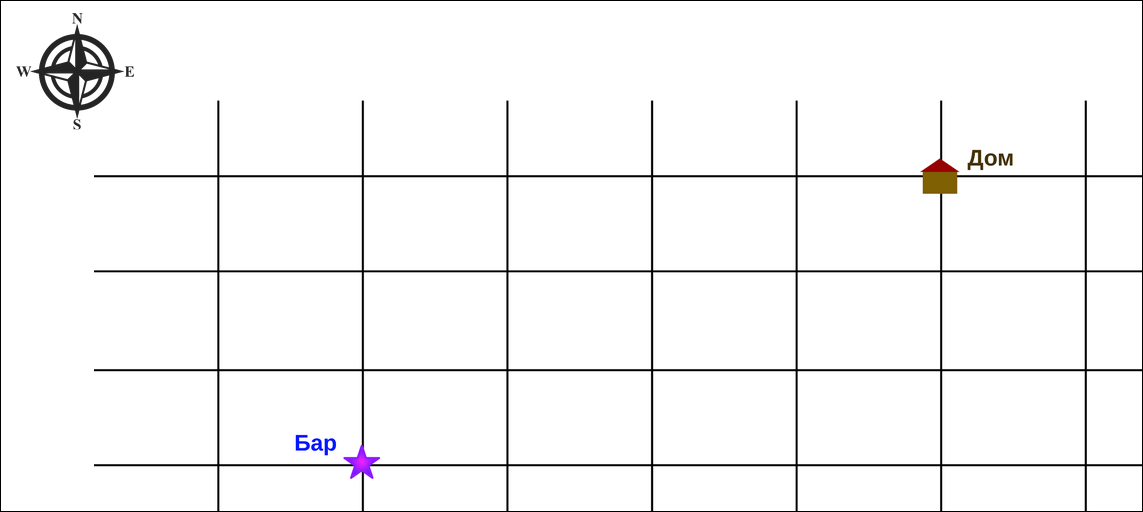

In [19]:
# моделированием вероятностного пространства
# N: 0, E: 1, Home: (E4, N3), steps credit: 7
omega = product(range(2), repeat=7)
n_omega = 2**7
lucky = sum(1 for track in omega if sum(track) == 4)
lucky / n_omega

0.2734375

См. также __`appstat_01.ipynb`__.